# PVlib introduction  
https://pvlib-python.readthedocs.io/en/stable/  


In [8]:
import pvlib
from pvlib import pvsystem

sandia_modules = pvsystem.retrieve_sam(name='SandiaMod')
print(sandia_modules)

                                         Advent_Solar_AS160___2006_  \
Vintage                                                        2006   
Area                                                          1.312   
Material                                                      mc-Si   
Cells_in_Series                                                  72   
Parallel_Strings                                                  1   
Isco                                                          5.564   
Voco                                                         42.832   
Impo                                                          5.028   
Vmpo                                                          32.41   
Aisc                                                       0.000537   
Aimp                                                      -0.000491   
C0                                                           1.0233   
C1                                                          -0.0233   
Bvoco 

In [9]:
inverters = pvsystem.retrieve_sam('sandiainverter')
print(inverters)

          ABB__MICRO_0_25_I_OUTD_US_208__208V_  \
Vac                                        208   
Pso                                   2.089607   
Paco                                     250.0   
Pdco                                259.588593   
Vdco                                      40.0   
C0                                   -0.000041   
C1                                   -0.000091   
C2                                    0.000494   
C3                                   -0.013171   
Pnt                                      0.075   
Vdcmax                                    50.0   
Idcmax                                6.489715   
Mppt_low                                  30.0   
Mppt_high                                 50.0   
CEC_Date                                   NaN   
CEC_Type                   Utility Interactive   

          ABB__MICRO_0_25_I_OUTD_US_240__240V_  \
Vac                                        240   
Pso                                   2.240412   

In [10]:
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

In [11]:
from pvlib.pvsystem import PVSystem

module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
inverter = inverters['ABB__MICRO_0_25_I_OUTD_US_208__208V_']

system = PVSystem(surface_tilt=20, surface_azimuth=200,
                  module_parameters=module,
                  inverter_parameters=inverter,
                  temperature_model_parameters=temperature_model_parameters)

In [12]:
from pvlib.location import Location

location = Location(latitude=50.941357, longitude= 6.958307,
                    tz='Europe/Berlin', altitude=80, name='Cologne')

In [13]:
from pvlib.modelchain import ModelChain

modelchain = ModelChain(system, location)

In [14]:
import pandas as pd

times = pd.date_range(start='2021-07-01', end='2021-07-07',
                      freq='1min', tz=location.tz)

In [15]:
clear_sky = location.get_clearsky(times)

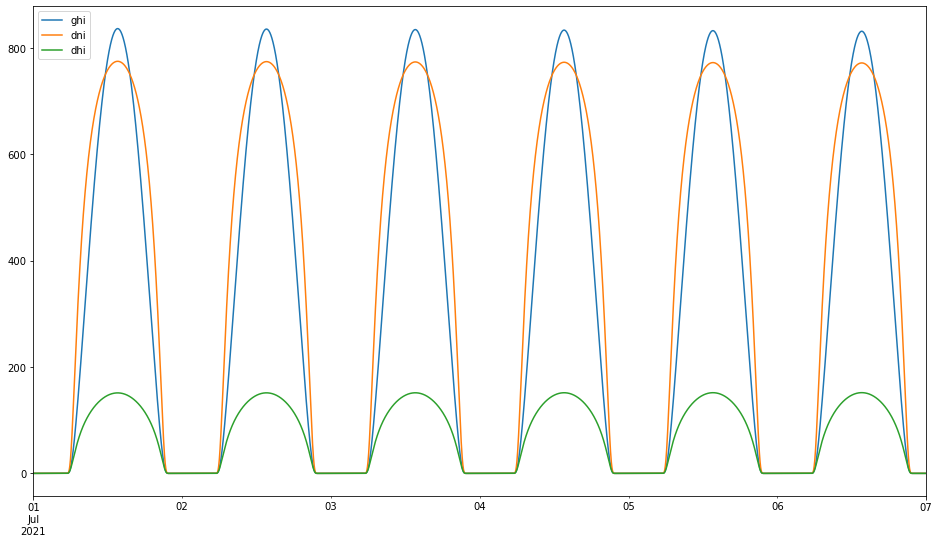

In [16]:
import matplotlib.pyplot as plt
clear_sky.plot(figsize=(16,9))
plt.show()

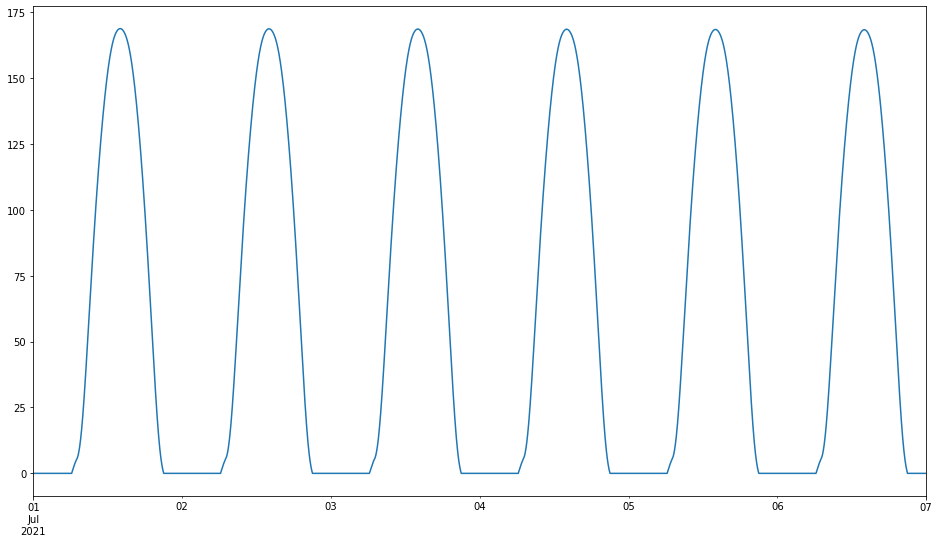

In [27]:
modelchain.run_model(clear_sky)
modelchain.results.ac.plot(figsize=(16,9))
plt.show()

In [28]:
weather = pd.read_csv("./data/dwd_pv_data_2015.csv", index_col="time")
weather.head()

,dhi,ghi,dni
time,,,
2015-01-01 00:00:00,0.0,0.0,0.0
2015-01-01 00:15:00,0.0,0.0,0.0
2015-01-01 00:30:00,0.0,0.0,0.0
2015-01-01 00:45:00,0.0,0.0,0.0
2015-01-01 01:00:00,0.0,0.0,0.0


<AxesSubplot:xlabel='time'>

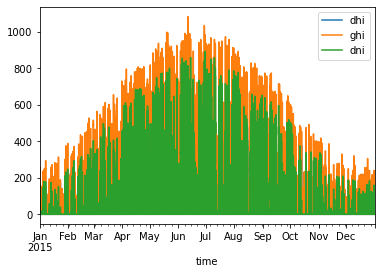

In [32]:
weather.index = pd.to_datetime(weather.index)
weather.plot()

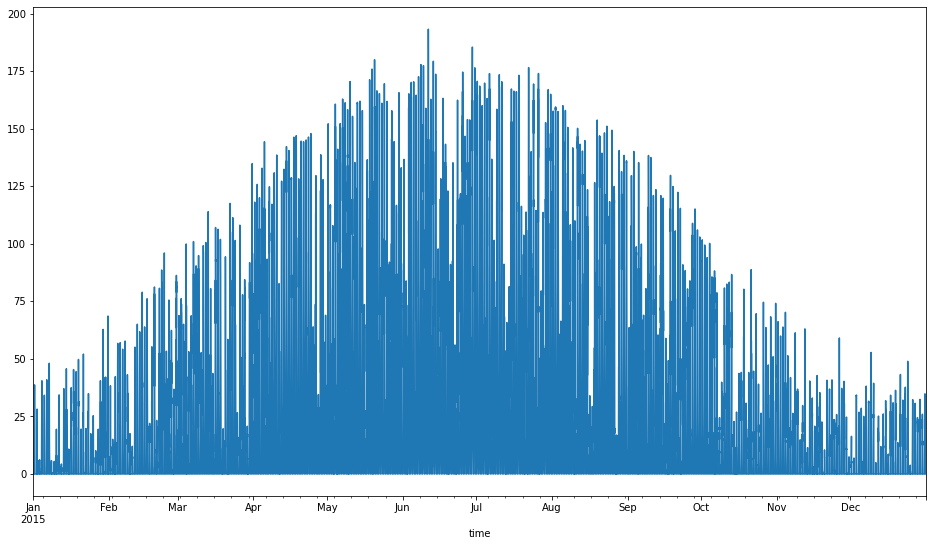

In [33]:
modelchain.run_model(weather=weather)
modelchain.results.ac.plot(figsize=(16,9))
plt.show()